# COVID-19 Dataset Analysis

This notebook analyzes COVID-19 case data up to April 29, 2020, including:
- Confirmed cases
- Deaths
- Recovered cases
by region/country.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Configure visualization settings
plt.style.use('ggplot')
sns.set_palette('husl')
%matplotlib inline

## Data Loading and Initial Inspection

In [4]:
df = pd.read_csv("Covid_19_Dataset.csv")
print(f"Data loaded successfully with {df.shape[0]} records")

Data loaded successfully with 321 records


In [5]:
# Basic data validation
required_columns = ['Region', 'Confirmed', 'Deaths', 'Recovered']
missing_cols = [col for col in required_columns if col not in df.columns]

## Data Quality Assessment

In [6]:
print("\n=== Data Completeness ===")
print("Record counts per column:")
print(df.count())


=== Data Completeness ===
Record counts per column:
Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64


In [7]:
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)


=== Missing Values ===
Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64


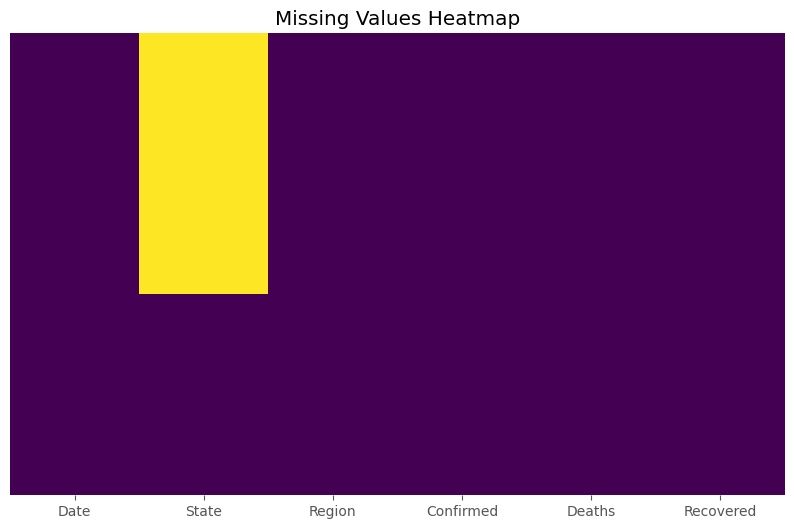

In [8]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Data Analysis Questions

In [9]:
# Q1: Cases by region
print("\n=== Confirmed, Deaths and Recovered Cases by Region ===")
regional_cases = df.groupby('Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
display(regional_cases.sort_values('Confirmed', ascending=False).head(20))


=== Confirmed, Deaths and Recovered Cases by Region ===


,Confirmed,Deaths,Recovered
Region,,,
US,1039909,60967,120720
Spain,236899,24275,132929
Italy,203591,27682,71252
France,166543,24121,49118
UK,166441,26166,857
Germany,161539,6467,120400
Turkey,117589,3081,44040
Russia,99399,972,10286
Iran,93657,5957,73791


In [10]:
# Q2: Filter low case counts
print("\n=== Removing records with <10 confirmed cases ===")
initial_count = df.shape[0]
df = df[df['Confirmed'] >= 10]
print(f"Removed {initial_count - df.shape[0]} records ({initial_count} → {df.shape[0]})")


=== Removing records with <10 confirmed cases ===
Removed 17 records (321 → 304)


In [11]:
# Q3: Region with max confirmed cases
max_confirmed = df.groupby('Region')['Confirmed'].sum().idxmax()
max_value = df.groupby('Region')['Confirmed'].sum().max()
print(f"\nRegion with maximum confirmed cases: {max_confirmed} ({max_value:,} cases)")


Region with maximum confirmed cases: US (1,039,909 cases)


In [12]:
# Q4: Region with min deaths
min_deaths = df.groupby('Region')['Deaths'].sum().idxmin()
min_value = df.groupby('Region')['Deaths'].sum().min()
print(f"\nRegion with minimum deaths: {min_deaths} ({min_value} deaths)")


Region with minimum deaths: Cambodia (0 deaths)


In [13]:
# Q5: Cases for specific countries
countries = ['India', 'US', 'Yemen']
print("\n=== Cases for Selected Countries ===")
for country in countries:
    country_data = df[df['Region'] == country]
    if not country_data.empty:
        confirmed = country_data['Confirmed'].sum()
        deaths = country_data['Deaths'].sum()
        recovered = country_data['Recovered'].sum()
        print(f"{country}: Confirmed={confirmed:,}, Deaths={deaths:,}, Recovered={recovered:,}")
    else:
        print(f"No data available for {country}")


=== Cases for Selected Countries ===
India: Confirmed=33,062, Deaths=1,079, Recovered=8,437
US: Confirmed=1,039,909, Deaths=60,967, Recovered=0
No data available for Yemen


In [14]:
# Q6A: Sort by confirmed cases (ascending)
print("\n=== Top 20 Regions by Confirmed Cases (Ascending) ===")
display(df.sort_values('Confirmed').head(20))


=== Top 20 Regions by Confirmed Cases (Ascending) ===


,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
256,4/29/2020,Montserrat,UK,11,1,2
144,4/29/2020,NaN,Seychelles,11,0,6
27,4/29/2020,NaN,Burundi,11,1,4
306,4/29/2020,Turks and Caicos Islands,UK,12,1,5
118,4/29/2020,NaN,Nicaragua,13,3,7


In [15]:
# Q6B: Sort by recovered cases (descending)
print("\n=== Top 20 Regions by Recovered Cases (Descending) ===")
display(df.sort_values('Recovered', ascending=False).head(20))


=== Top 20 Regions by Recovered Cases (Descending) ===


,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600
78,4/29/2020,NaN,Ireland,20253,1190,13386


## Additional Visualizations

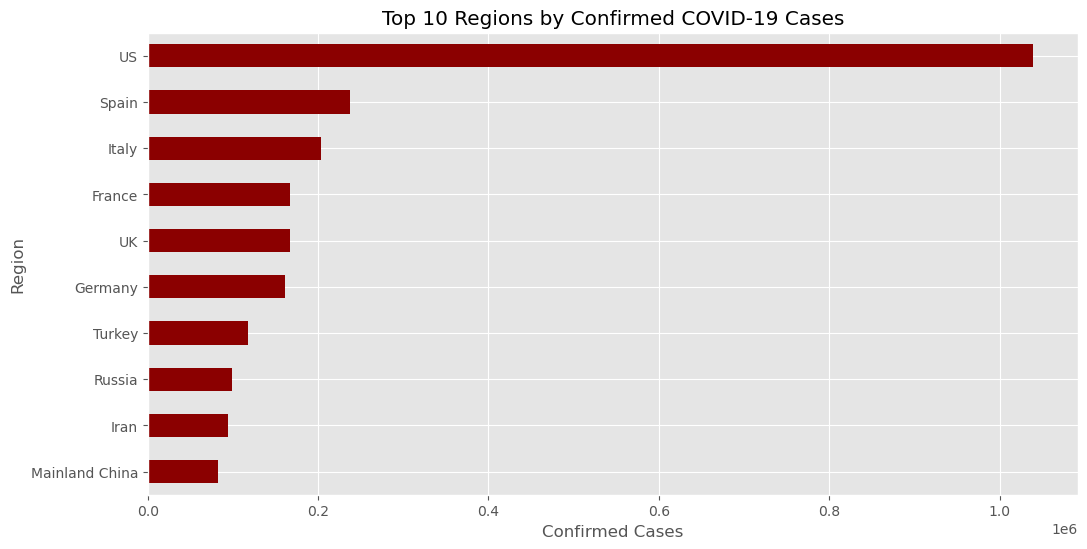

In [16]:
# Top 10 regions by confirmed cases
top_regions = df.groupby('Region')['Confirmed'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_regions.sort_values().plot(kind='barh', color='darkred')
plt.title('Top 10 Regions by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Region')
plt.show()

In [17]:
# Case fatality ratio by region (for regions with >1000 cases)
regional_stats = df.groupby('Region')[['Confirmed', 'Deaths']].sum()
regional_stats = regional_stats[regional_stats['Confirmed'] > 1000]
regional_stats['CFR'] = (regional_stats['Deaths'] / regional_stats['Confirmed']) * 100
regional_stats = regional_stats.sort_values('CFR', ascending=False)

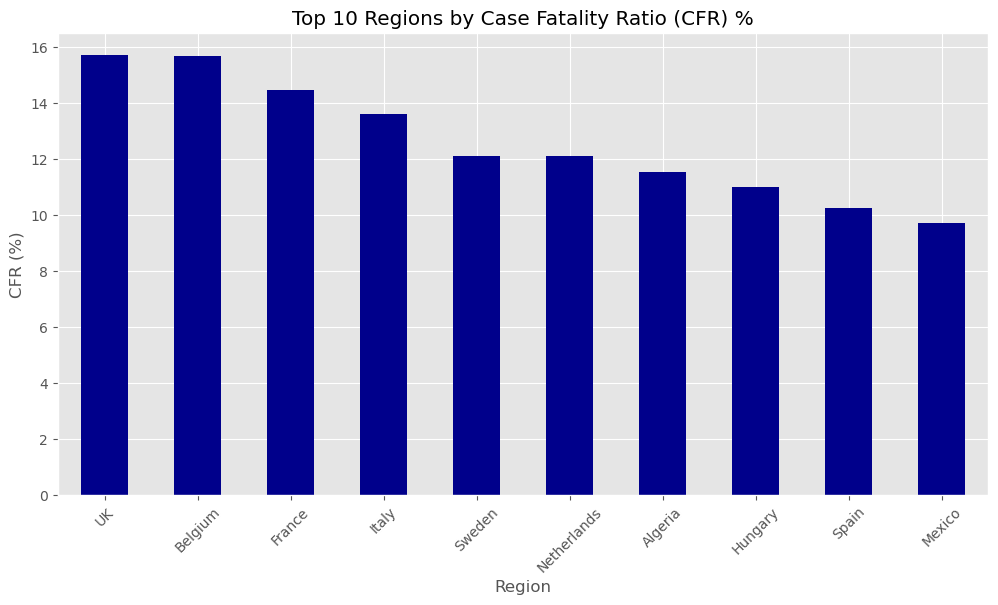

In [18]:
plt.figure(figsize=(12, 6))
regional_stats['CFR'].head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 Regions by Case Fatality Ratio (CFR) %')
plt.ylabel('CFR (%)')
plt.xticks(rotation=45)
plt.show()

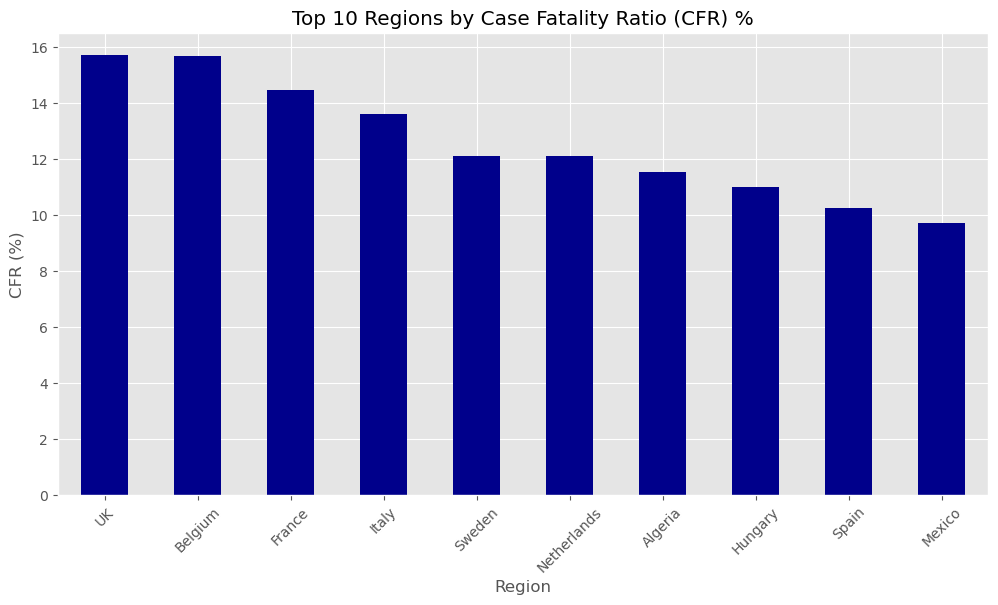

In [19]:
plt.figure(figsize=(12, 6))
regional_stats['CFR'].head(10).plot(kind='bar', color='darkblue')
plt.title('Top 10 Regions by Case Fatality Ratio (CFR) %')
plt.ylabel('CFR (%)')
plt.xticks(rotation=45)
plt.show()